In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import ttest_1samp

In [4]:
np.random.seed(seed=1307)

size = 60

df = pd.DataFrame(data={
    "sales_wout_ad": np.random.normal(loc=27, scale=5, size=size),
    "sales_w_ad": np.random.normal(loc=31, scale=18, size=size)
})
df["diff"] = df["sales_w_ad"] - df["sales_wout_ad"]
df.describe()

,sales_wout_ad,sales_w_ad,diff
count,60.000000,60.000000,60.000000
mean,26.233204,28.750597,2.517393
std,5.120173,18.513869,19.423948
min,12.282069,-20.234572,-44.693799
25%,22.107120,18.152936,-9.287856
50%,27.086335,29.007695,3.930201
75%,28.987633,43.095951,16.587019
max,37.385055,62.330539,38.201941


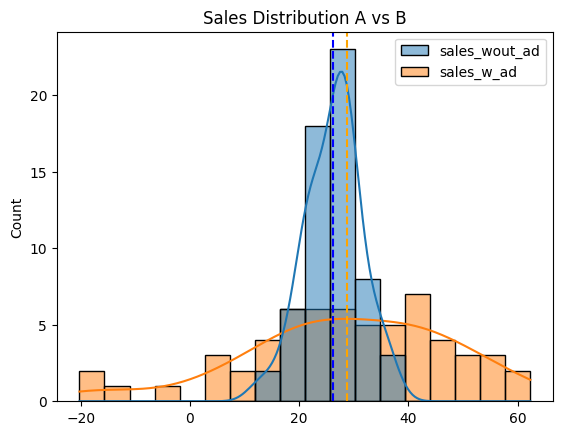

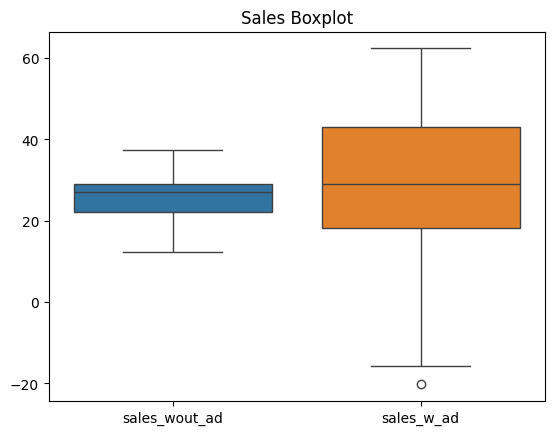

In [11]:
sns.histplot(data= df[["sales_wout_ad", "sales_w_ad"]], kde=True)
plt.axvline(df["sales_wout_ad"].mean(), color="blue", linestyle = "--")
plt.axvline(df["sales_w_ad"].mean(), color="orange", linestyle = "--")
plt.title("Sales Distribution A vs B")
plt.show()

sns.boxplot(data= df[["sales_wout_ad", "sales_w_ad"]])
plt.title("Sales Boxplot")
plt.show()

A/B test = is the change making sense or is it just noise

T test - Is the experiment really worth it? calculates p value - which is measure of noise. Higher [closer to 1] means more noise, lower is better.

A t-test is a statistical method used to determine whether the difference between two groups is real or just due to chance.

The null hypothesis - the t-test always starts with a null hypothesis, which says:

    "There is no difference between the two groups. Any change is pure randomness."

The test then calculates a p-value(proabability value) of how likely the null hypothesis is true.

In [16]:
result = ttest_1samp(df["diff"], popmean=0)
print("t-stat:", result.statistic)
print("p-value(two-sided):", result.pvalue)

p_one_sided = result.pvalue/ 2
print("p-value(one-sided):", p_one_sided)

t-stat: 1.0038968498108374
p-value(two-sided): 0.31952794542704543
p-value(one-sided): 0.15976397271352272


T-test: Compares two sets of data to see if they are statistically different.

Null hypothesis(H <sub>0</sub>): There is no difference between two sets of experiment. The T-test tries to disproves this.

P-value: Probability value - the lower the value, higher the significance.

Confidence interval: The likely range where the true effect lies.